In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

(-0.5, 1.5, 99.5, -0.5)

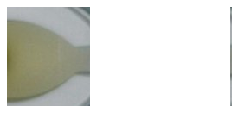

In [16]:
img_bgr = cv2.imread("2.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

x,y,chaneel=img_bgr.shape
#x:width y:height
x = int(x/2)
y = int(y/2)
dst = img_rgb.copy()
dst = dst[(x-50):(x+50), (y-50):(y+50)]

# plots
plt.subplot(221)
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(222)
plt.imshow(dst)
plt.axis('off')

In [17]:
from sklearn.cluster import KMeans

In [18]:
#k-mean 알고리즘은 머신러닝 비지도 학습중 가장 일반적인 모델로
#k개 데이터 평균을 만들어 데이터를 clustering하는 알고리즘

new_rgb = dst.reshape((dst.shape[0]*dst.shape[1],3))
print(new_rgb.shape)

k=1
clt = KMeans(n_clusters = k)
clt.fit(new_rgb)

(200, 3)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
for center in clt.cluster_centers_:
    print(center)

[148.405 154.455 153.52 ]


In [20]:
col = clt.cluster_centers_.astype("uint8").flatten().tolist()
print(col)


[148, 154, 153]


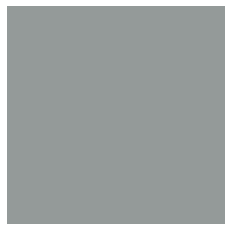

In [21]:
bar = np.zeros((1,1,3),dtype="uint8")
startX=0
endX=5
cv2.rectangle(bar, (int(startX), 0),(int(endX),0),col, -1)
#두께에 -1 값 주면 내부 색칠된 사각형 얻음

plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()


In [132]:
def get_HSV(color):
    r,g,b=color
    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (60 * ((g-b)/df) + 360) % 360
    elif mx == g:
        h = (60 * ((b-r)/df) + 120) % 360
    elif mx == b:
        h = (60 * ((r-g)/df) + 240) % 360
    if mx == 0:
        s = 0
    else:
        s = (df/mx)*100
    v = mx*100
    return h, s, v

In [133]:
print(col)
get_HSV(col)

[111, 195, 239]


(200.625, 53.55648535564853, 93.72549019607843)

In [54]:
def plot_colors(hist,centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0
    endX = 100
    cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
    # return the bar chart
    return bar

bar = plot_colors(hist, clt.cluster_centers_)

plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()


NameError: name 'color' is not defined

In [142]:
type = [[(2,4),[3,7]],[[1,3],[7,9]]]
print(type[0][0])

for i in type[0][0]:
    print(i)

(2, 4)
2
4


In [151]:
result=-1
hsv= [56,40,80]
types = [[[0,359],[0,5],[50,100]],
         [[50,70],[6,45],[75,85]],
         [[50,70],[46,60],[60,74]],
         [[50,70],[61,70],[55,61]],
         [[50,70],[51,60],[50,54]],
         [[30,49],[35,70],[50,60]],
         [[0,25],[20,100],[20,80]],
         [[30,40],[25,34],[40,60]],
         [[69,240],[15,100],[30,80]]]

for i in range(9):
    if hsv[0] in range(types[i][0][0],types[i][0][1]):
        if hsv[1] in range(types[i][1][0],types[i][1][1]):
            if hsv[2] in range(types[i][2][0],types[i][2][1]):
                result=i
            
print(result)

1


In [ ]:
for i in range(9):
    for j in range(1):
        if  in range(2)